In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

csvpath = os.path.join('2018_Crash_Information','ACCIDENT.csv')



In [2]:
accident_df = pd.read_csv('/Users/raishandrews/Desktop/Crash_Dummy/2018_Crash_Information/ACCIDENT.csv')

In [34]:
with open(csvpath) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    csv_header = next(csvreader)
#     print(f"CSV Header: {csv_header}")
#     for row in csvreader:
#         print(row)    

In [35]:
accident_df.head()

,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,MANCOL_IM,RELJCT1_IM,RELJCT2_IM,LGTCON_IM,WEATHR_IM,MAXSEV_IM,NO_INJ_IM,ALCHL_IM,PSUSTRAT,WEIGHT
0,201800381338,4,56,208,208,1,9,4,4,0,...,1,0,1,1,1,0,0,2,20,187.193308
1,201800381366,4,56,214,214,1,7,3,3,0,...,1,0,1,1,1,1,1,2,20,149.787336
2,201800381374,4,56,214,214,1,6,2,2,0,...,7,0,1,2,1,1,2,2,20,76.421258
3,201800383118,4,56,209,209,1,10,2,2,0,...,6,0,2,1,10,1,1,2,20,265.232273
4,201800383942,4,64,306,64,1,6,2,2,0,...,7,0,1,1,10,1,1,2,23,78.134540


In [36]:
accident_df.describe()

,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,MANCOL_IM,RELJCT1_IM,RELJCT2_IM,LGTCON_IM,WEATHR_IM,MAXSEV_IM,NO_INJ_IM,ALCHL_IM,PSUSTRAT,WEIGHT
count,4.844300e+04,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,...,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000,48443.000000
mean,2.018009e+11,2.713436,48.036311,1385.060628,52.416985,1.218174,7.296431,1.830646,1.777450,0.053197,...,2.607580,0.035382,2.562434,1.595194,2.602729,0.920236,0.721157,1.948042,12.380571,139.017326
std,2.381253e+05,0.906444,19.678810,1064.697585,33.159322,0.413010,2.508255,0.648344,0.644722,0.275018,...,2.918827,0.184745,2.820116,1.031158,3.246031,1.146145,0.968470,0.221944,6.333932,78.195337
min,2.018004e+11,1.000000,10.000000,45.000000,10.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,12.086423
25%,2.018007e+11,2.000000,32.000000,456.000000,32.000000,1.000000,6.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,8.000000,67.781649
50%,2.018009e+11,3.000000,48.000000,1098.000000,48.000000,1.000000,8.000000,2.000000,2.000000,0.000000,...,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,12.000000,160.185536
75%,2.018011e+11,3.000000,64.000000,2091.000000,66.000000,1.000000,9.000000,2.000000,2.000000,0.000000,...,6.000000,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,16.000000,180.935347
max,2.018014e+11,4.000000,83.000000,4125.000000,214.000000,2.000000,10.000000,15.000000,15.000000,10.000000,...,11.000000,1.000000,20.000000,7.000000,12.000000,8.000000,17.000000,2.000000,25.000000,586.072477


In [44]:
#Shrinking the data for usable collumns 
location_df = accident_df.loc[:,['CASENUM', 'REGION', 'URBANICITY', 'WRK_ZONE', 'RELJCT2_IM', 'REL_ROAD', 'MANCOL_IM', 'HARM_EV', 'RELJCT1', 'INT_HWY']]

In [45]:
#Replacing Work Zone Variable names 
location_df['WRK_ZONE'] = location_df['WRK_ZONE'].replace(
    { 0: 'None', 1: 'Construction', 2: 'Maintnence', 3: 'Utility', 4:'Unknown Type'})


location_df['WRK_ZONE'].value_counts()

None            47581
Construction      474
Unknown Type      304
Maintnence         67
Utility            17
Name: WRK_ZONE, dtype: int64

<AxesSubplot:title={'center':'WRK_ZONE'}>

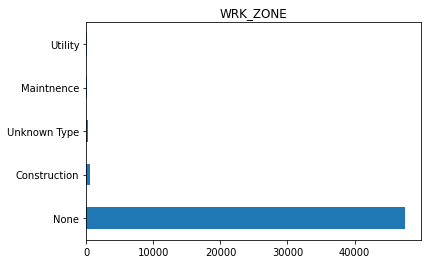

In [46]:
#Creating Work Zone Variable
Work_Zone_Cases = location_df ['WRK_ZONE'].value_counts()
Work_Zone_Cases

Work_Zone_Cases.T.plot.barh( stacked = True, title = 'WRK_ZONE')

In [72]:
#Replacing Relative Road Variables 
location_df['REL_ROAD'] = location_df['REL_ROAD'].replace(
    { 1: 'On Roadway', 
     2: 'On Shoulder', 
     3: 'On Median', 
     4: 'On Roadside',
     5: 'Outside Trafficway',
     6:'Off Roadway – Location Unknown', 
     7:'In Parking Lane/Zone',
     8:'Gore',
     10:'Separator',
     11:'Continuous Left Turn Lane',
     98:'Not Reported',
     '--':'Unknown',
     99:'Reported as Unknown'})

location_df['REL_ROAD'].value_counts()

On Roadway                        38924
On Roadside                        5903
In Parking Lane/Zone               1493
On Median                           972
Outside Trafficway                  382
On Shoulder                         339
Off Roadway – Location Unknown      155
Continuous Left Turn Lane            94
Gore                                 93
Not Reported                         43
12                                   26
Reported as Unknown                  10
Separator                             9
Name: REL_ROAD, dtype: int64

<AxesSubplot:title={'center':'REL_ROAD'}>

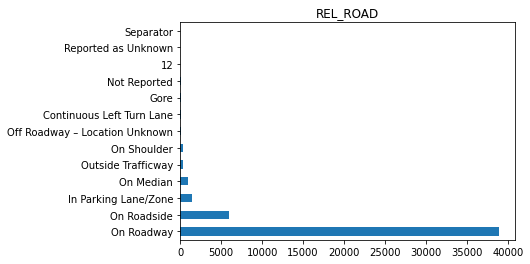

In [73]:
#Creating Relative Road Variable
relative_road = location_df ['REL_ROAD'].value_counts()
relative_road

relative_road.T.plot.barh( stacked = True, title = 'REL_ROAD')

In [74]:
#Replacing Region Variables
location_df['REGION'] = location_df['REGION'].replace(
    {1:'Northeast', 2:'Midwest', 3:'South', 4:'West'})

location_df['REGION'].value_counts()



South        24886
Midwest       8608
West          8208
Northeast     6741
Name: REGION, dtype: int64

<AxesSubplot:title={'center':'REGION'}>

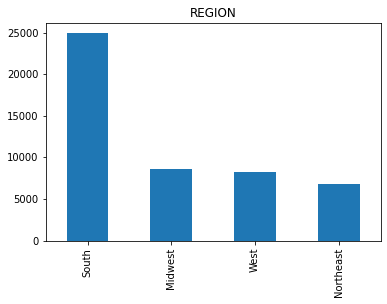

In [75]:
#Creating Region Variable 
Regions = location_df ['REGION'].value_counts()
Regions 

Regions.T.plot.bar( stacked = True, title = 'REGION')

In [76]:
location_df['URBANICITY'] = location_df['URBANICITY'].replace(
    {1:'Urban', 2:'Rural'}) 

location_df['URBANICITY'].value_counts()

Urban    37874
Rural    10569
Name: URBANICITY, dtype: int64

<AxesSubplot:title={'center':'URBANICITY'}>

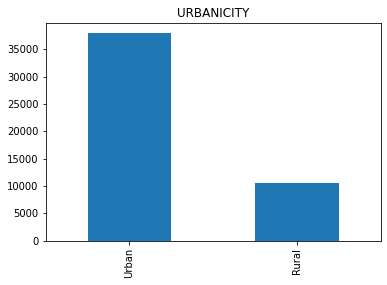

In [77]:
urban_City = location_df ['URBANICITY'].value_counts()
urban_City 

urban_City.plot.bar( stacked = True, title = 'URBANICITY')

<AxesSubplot:title={'center':'region_VS_urbancity'}, xlabel='URBANICITY,REGION'>

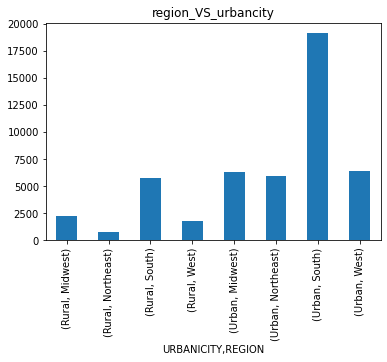

In [87]:
#Comparing the region and urbancity 
#Create a New Data Frame 
region_VS_urbancity = location_df.loc[:,[ 'URBANICITY',  'REGION']].value_counts()

#Group by the total accidents in each area
urb_reg_group = region_VS_urbancity.groupby (['URBANICITY',  'REGION']).sum()
urb_reg_group

urb_reg_group.plot.bar( stacked = True, title = 'region_VS_urbancity')

In [16]:
location_df['INT_HWY'] = location_df['INT_HWY'].replace(
    {0:'No', 1:'Yes', 9:'Unknown'})

location_df['INT_HWY'].value_counts()

No         43617
Yes         4822
Unknown        4
Name: INT_HWY, dtype: int64

<AxesSubplot:title={'center':'INT_HWY'}>

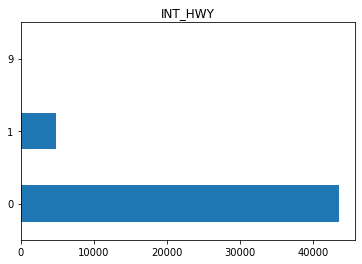

In [114]:
interstate_HWY = location_df ['INT_HWY'].value_counts()
interstate_HWY

interstate_HWY.plot.barh( stacked = True, title = 'INT_HWY')

In [115]:
location_df['RELJCT2_IM'] = location_df['RELJCT2_IM'].replace(
   {1: 'Non-Junction',
    2: 'Intersection',
    3: 'Intersection Related',
    4: 'Driveway Access',
    5: 'Entrance/Exit Ramp Related',
    6: 'Railway Grade Crossing',
    7: 'Crossover Related',
    8: 'Driveway Access Related',
    16:'Shared-Use Path Crossing',
    17:'Acceleration/Deceleration Lane',
    18:'Through Roadway',
    19:'Other Location Within Interchange Area',
    20:'Entrance/Exit Ramp'})

location_df['RELJCT2_IM'].value_counts()

Non-Junction                              21154
Intersection Related                      11276
Intersection                              10745
Driveway Access Related                    3407
Entrance/Exit Ramp Related                  572
Entrance/Exit Ramp                          501
Driveway Access                             366
Through Roadway                             202
Crossover Related                           105
Other Location Within Interchange Area       55
Railway Grade Crossing                       34
Acceleration/Deceleration Lane               24
Shared-Use Path Crossing                      2
Name: RELJCT2_IM, dtype: int64

<AxesSubplot:title={'center':'RELJCT2_IM'}>

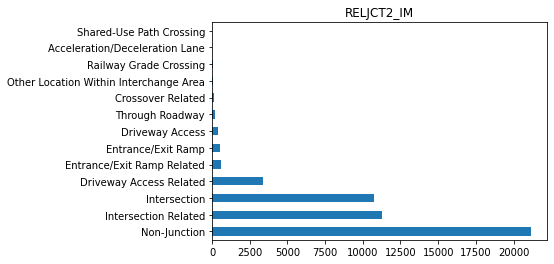

In [116]:
relative_junction = location_df ['RELJCT2_IM'].value_counts()
relative_junction

relative_junction.plot.barh( stacked = True, title = 'RELJCT2_IM')

In [117]:
location_df['MANCOL_IM'] = location_df['MANCOL_IM'].replace(
   {0:  'Not Collision with Motor Vehicle in Transport',
    '--': 'First Harmful Event was Not a Collision with Motor Vehicle in Transport',
    1 : 'Front-to-Rear',
    2 : 'Front-to-Front',
    6 : 'Angle',
    7 : 'Sideswipe, Same Direction',
    8 : 'Sideswipe, Opposite Direction',
    9 : 'Rear-to-Side',
    10: 'Rear-to-Rear',
    11: 'Other',
    98: 'Not Reported',
    '--': 'Unknown',
    99: 'Reported as Unknown'})

location_df['MANCOL_IM'].value_counts()

Not Collision with Motor Vehicle in Transport    15699
Front-to-Rear                                    14513
Angle                                            10642
Sideswipe, Same Direction                         4725
Front-to-Front                                    1537
Sideswipe, Opposite Direction                      699
Rear-to-Side                                       332
Other                                              265
Rear-to-Rear                                        31
Name: MANCOL_IM, dtype: int64

<AxesSubplot:title={'center':'Manner_of_Collision'}>

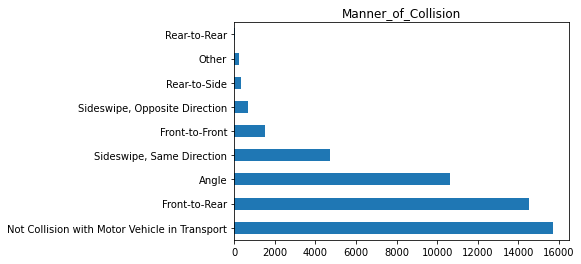

In [118]:
Manner_of_Collision = location_df ['MANCOL_IM'].value_counts()
Manner_of_Collision.T.plot.barh( stacked = True, title = 'Manner_of_Collision')

In [119]:
location_df['HARM_EV'] = location_df['HARM_EV'].replace(
   {1: 'Rollover/Overturn',
2: 'Fire/Explosion',
3: 'Immersion or Partial Immersion',
4: 'Gas Inhalation',
5: 'Fell/Jumped from Vehicle',
6: 'Injured in Vehicle (Non-Collision)',
7: 'Other Noncollision',
16:'Thrown or Falling Object',
44:'Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)',
51:'Jackknife (Harmful to This Vehicle)',
'--': 'Cargo/Equipment Loss or Shift (Harmful to This Vehicle)',
72:'Cargo/Equipment Loss, Shift, or Damage (Harmful)',

12:'Motor Vehicle In-Transport',
54:'Motor Vehicle In-Transport Strikes or is Struck by Cargo, Persons or Objects Set-in-Motion from/by Another Motor Vehicle In-Transport',
55:'Motor Vehicle in Motion Outside the Trafficway',

8:  'Pedestrian',
9:  'Pedalcyclist',
10: 'Railway Vehicle',
11: 'Live Animal',
14: 'Parked Motor Vehicle',
15: 'Non-Motorist on Personal Conveyance',
18: 'Other Object Not Fixed',
45: 'Working Motor Vehicle',
49: 'Ridden Animal or Animal Drawn Conveyance',
73: 'Object That Had Fallen From Motor Vehicle In-Transport',
74: 'Road Vehicle on Rails',
91: 'Unknown Object Not Fixed',

17: 'Boulder',
19: 'Building',
20: 'Impact Attenuator/Crash Cushion',
21: 'Bridge Pier or Support',
23: 'Bridge Rail (Includes Parapet)',
24: 'Guardrail Face',
25: 'Concrete Traffic Barrier',
26: 'Other Traffic Barrier',
30: 'Utility Pole/Light Support',
31: 'Post, Pole or Other Support',
32: 'Culvert',
33: 'Curb',
34: 'Ditch',
35: 'Embankment',
38: 'Fence',
39: 'Wall',
40: 'Fire Hydrant',

41: 'Shrubbery',
42: 'Tree (Standing Only)',
43: 'Other Fixed Object',
46: 'Traffic Signal Support',
48: 'Snow Bank',
50: 'Bridge Overhead Structure',
52: 'Guardrail End',
53: 'Mail Box',
57: 'Cable Barrier',
58: 'Ground',
59: 'Traffic Sign Support',
93: 'Unknown Fixed Object',
98: 'Harmful Event, Details Not Reported (Since 2019)',
'--': 'Unknown',
99: 'Reported as Unknown',})

location_df['HARM_EV'].value_counts()

Motor Vehicle In-Transport                                                                                                               32610
Pedestrian                                                                                                                                2203
Parked Motor Vehicle                                                                                                                      1853
Live Animal                                                                                                                               1624
Pedalcyclist                                                                                                                              1396
Rollover/Overturn                                                                                                                         1160
Ditch                                                                                                                                      916

<AxesSubplot:title={'center':'HARM_EV'}>

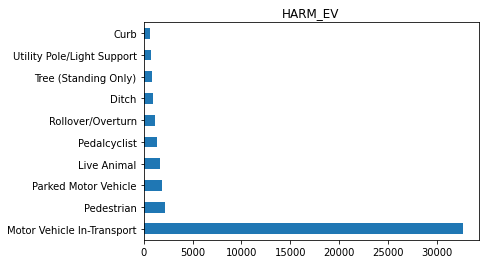

In [120]:
harm_Condition = location_df ['HARM_EV'].value_counts().head(10)

harm_Condition.T.plot.barh( stacked = True, title = 'HARM_EV')

<AxesSubplot:title={'center':'Manner_VS_Region'}, xlabel='MANCOL_IM,REGION'>

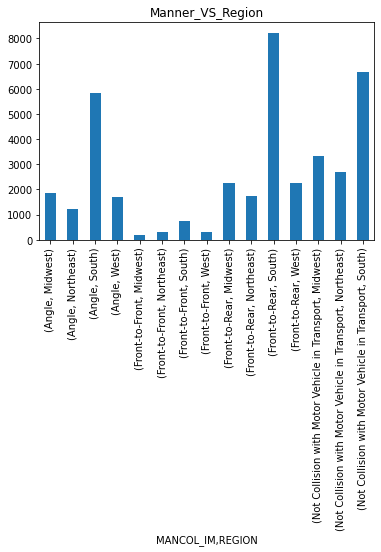

In [121]:
#Comparing the region and urbancity 
#Create a New Data Frame 
Manner_VS_Region = location_df.loc[:,[ 'MANCOL_IM', 'REGION']].value_counts()
Manner_VS_Region

#Group by the total accidents in each area
mann_Region_group = Manner_VS_Region.groupby (['MANCOL_IM', 'REGION']).sum().head(15)
mann_Region_group

mann_Region_group.plot.bar( stacked = True, title = 'Manner_VS_Region')


In [132]:
Manner_VS_Region = location_df.loc[:,[ 'MANCOL_IM', 'REGION','INT_HWY']].value_counts()
Manner_VS_Region

#Group by the total accidents in each area
mann_ReLJ_group = location_df.groupby (['MANCOL_IM', 'REGION']).count()['INT_HWY']
mann_ReLJ_group

# mann_ReLJ_group.plot.bar( stacked = True, title = 'Manner_VS_Region')

MANCOL_IM                                      REGION   
Angle                                          Midwest      1873
                                               Northeast    1234
                                               South        5830
                                               West         1705
Front-to-Front                                 Midwest       198
                                               Northeast     302
                                               South         735
                                               West          302
Front-to-Rear                                  Midwest      2252
                                               Northeast    1759
                                               South        8230
                                               West         2272
Not Collision with Motor Vehicle in Transport  Midwest      3332
                                               Northeast    2685
                                 